# DSC 106 HW4

In [1]:
from imdbpie import ImdbFacade
from imdbpie import Imdb
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import tqdm
import time
import pickle
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
client = Imdb(locale='en_US')
imdb = ImdbFacade(client=client)

### Brad Pitt, Leonardo DiCaprio and Matt Damon are three great actors with similar ages, artistic achievements and reputatioins. In this assignment, I'll try to compare their performances in their previous works. 

#### Here we try to find out how many movies available in our dataset for each of them

In [3]:
brad = imdb.get_name(imdb.search_for_name('Brad Pitt')[0].imdb_id)
len(brad.filmography)

473

In [4]:
leo = imdb.get_name(imdb.search_for_name('Leonardo DiCaprio')[0].imdb_id)
len(leo.filmography)

431

In [5]:
matt = imdb.get_name(imdb.search_for_name('Matt Damon')[0].imdb_id)
len(matt.filmography)

475

#### The number of movies available for them are in a same scale

#### We then try to download the data related to three of them and extract the part we are interested in. Once we run the downloading data code, we store the data so no need to run it agian (that's why some code below are commented)

In [6]:
interest_list = [
 'genres',
 'plot_outline',
 'rating',
 'rating_count',
 'runtime',
 'stars',
 'title',
 'year']

def film_to_dict(film):
    temp = {x:getattr(film, x) for x in interest_list}
    return temp

In [59]:
# brad_films_dict = {}
# for film_id in tqdm.tqdm(brad.filmography):
#     film = imdb.get_title(imdb_id=film_id)
#     time.sleep(2)
#     brad_films_dict[film_id]=film_to_dict(film)

100%|██████████████████████████████████████████████████████████████████████████████| 473/473 [1:11:48<00:00, 11.79s/it]


In [60]:
# with open('brad.pkl','wb') as f:
#     pickle.dump(brad_films_dict, f)

In [7]:
with open('brad.pkl','rb') as f:
    brad_films_dict = pickle.load(f)

In [8]:
len(brad_films_dict)

438

In [13]:
# leo_films_dict = {}
# for film_id in tqdm.tqdm(leo.filmography):
#     try:
#         film = imdb.get_title(imdb_id=film_id)
#     except:
#         continue
#     time.sleep(1)
#     leo_films_dict[film_id]=film_to_dict(film)
    
# with open('leo.pkl','wb') as f:
#     pickle.dump(leo_films_dict, f)

100%|████████████████████████████████████████████████████████████████████████████████| 431/431 [58:42<00:00,  8.06s/it]


In [9]:
with open('leo.pkl','rb') as f:
    leo_films_dict = pickle.load(f)

In [10]:
len(leo_films_dict)

397

In [11]:
# matt_films_dict = {}
# for film_id in tqdm.tqdm(matt.filmography):
#     try:
#         film = imdb.get_title(imdb_id=film_id)
#     except:
#         continue
#     time.sleep(1)
#     matt_films_dict[film_id]=film_to_dict(film)
    
# with open('matt.pkl','wb') as f:
#     pickle.dump(matt_films_dict, f)

In [12]:
with open('matt.pkl','rb') as f:
    matt_films_dict = pickle.load(f)

In [13]:
len(matt_films_dict)

439

## Word Cloud

#### I would like to know what kind of movies they are likely to be in? However, it may take a lot of time to read the outlines, so we make a word cloud for the words in the outlines for each on them. For the word cloud, I will make them into the shape and the color of the corresponding actor's picture.

In [14]:
def extract_outline_text(films_dict):
    text=''
    for k in films_dict:
        outline = str(films_dict[k]['plot_outline'])
        outline = ' '.join(outline.split())
        text += outline
    return text.lower()

stopwords = list(STOPWORDS)
stopwords+=['film', 'show', 'new', 'movie', 'hollywood','year', 'actor']

### Brad Pitt

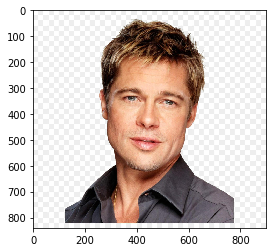

In [15]:
plt.imshow(Image.open('brad.jpg'))

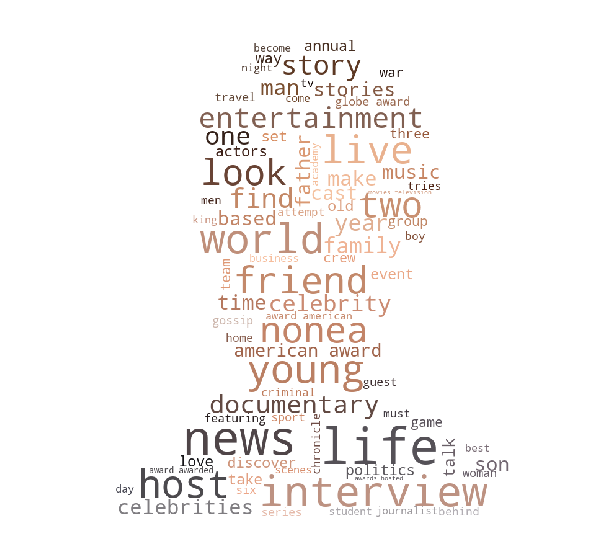

In [16]:
temp = extract_outline_text(brad_films_dict)
coloring = np.array(Image.open('brad.jpg'))
image_colors = ImageColorGenerator(coloring)
wordcloud = WordCloud(background_color="white",width=1000, height=860, mask = coloring ,margin=2, stopwords=stopwords, min_font_size=10, max_font_size=80).generate(temp)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

### Leonardo DiCaprio

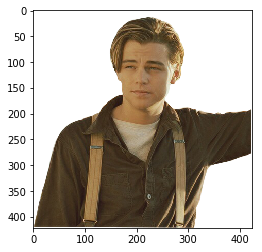

In [17]:
plt.imshow(Image.open('leo.png'))

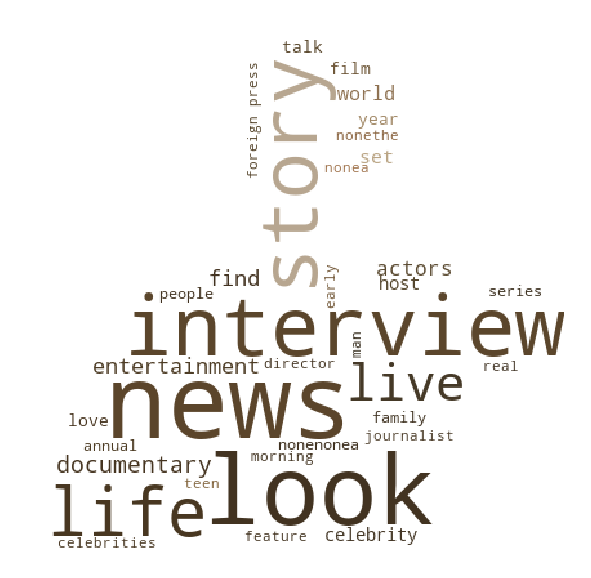

In [18]:
temp = extract_outline_text(leo_films_dict)
coloring = np.array(Image.open('leo.png'))
image_colors = ImageColorGenerator(coloring)
wordcloud = WordCloud(background_color="white",width=1000, height=860, mask = coloring ,margin=2, stopwords=stopwords, min_font_size=10, max_font_size=80).generate(temp)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

### Matt Damon

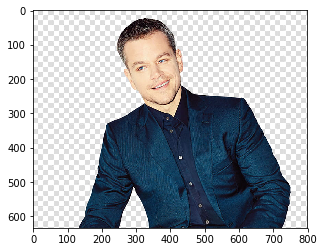

In [19]:
plt.imshow(Image.open('matt.jpg'))

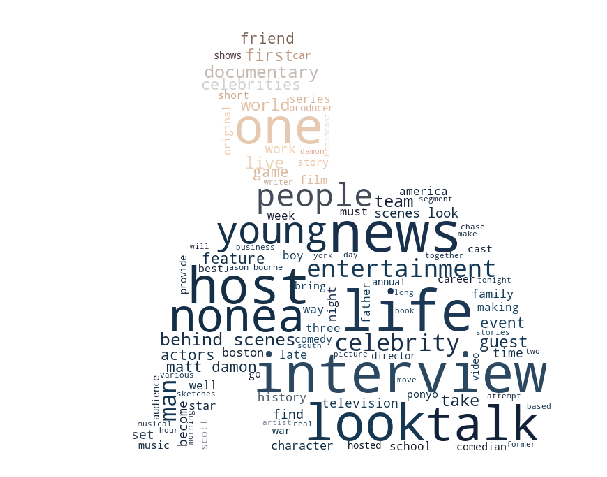

In [20]:
temp = extract_outline_text(matt_films_dict)
coloring = np.array(Image.open('matt.jpg'))
image_colors = ImageColorGenerator(coloring)
wordcloud = WordCloud(background_color="white",width=1000, height=860, mask = coloring ,margin=2, stopwords=stopwords, min_font_size=10, max_font_size=80).generate(temp)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

## Interactive Bubble Chart

#### I also wanna explore some trends related to their works. Are the rating going up or down? Are they still in their prime era? Therefore, I created this interactive bubble chart. The chart shows the ratings of the movies they casted in as well as the size of each bubble representing the popularity of the movie (number of ratings). To make the visualization readable, we only consider movies with over 40000 ratings. 

#### Tips: for the interaction, you can select an area of interest and the chart will zoom in to the selected area. Also, having the mouse covering any bubble will show the quatitative data. 

In [21]:
fig = go.Figure()
year = []
rating = []
count = []
threshold = 40000
for film_id, data in brad_films_dict.items():
    if data['year'] == None or data['rating'] == None or data['rating_count']<=threshold:
        continue
    year.append(data['year'])
    rating.append(data['rating'])
    count.append(data['rating_count'])
    
fig.add_trace(go.Scatter(
    x=year, y=rating,
    name='Brad Pitt',
    marker_size=count
    ))

year = []
rating = []
count = []
for film_id, data in leo_films_dict.items():
    if data['year'] == None or data['rating'] == None or data['rating_count']<=threshold:
        continue
    year.append(data['year'])
    rating.append(data['rating'])
    count.append(data['rating_count'])
    
fig.add_trace(go.Scatter(
    x=year, y=rating,
    name='Leonardo DiCaprio',
    marker_size=count
    ))

year = []
rating = []
count = []
for film_id, data in matt_films_dict.items():
    if data['year'] == None or data['rating'] == None or data['rating_count']<=threshold:
        continue
    year.append(data['year'])
    rating.append(data['rating'])
    count.append(data['rating_count'])
    
fig.add_trace(go.Scatter(
    x=year, y=rating,
    name='Matt Damon',
    marker_size=count
    ))

sizeref = 3*max(count)/(100**2)

fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Ratings Comparison among Brad Pitt, Leonardo Dicaprio, Matt Damon (Interactive Plot)',
    xaxis=dict(
        title='Year',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Ratings (1-10)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()

#### We notice that Brad Pitt is in the decresing trend and he achieve his prime day in late 90s and early 2000s. Leonardo DiCaprio reached his prime day around 2010. Matt Damon is in a quite flat trend, but he is somewhat behind the other two in terms of popularity and ratings at their best days. 

## Radar Chart (Interactive)

#### If a director want to pick an actor for a movie with a specific genre, which one of them show the director pick to achieve a higher rating? Here we use the radar chart to compare their performances in different genres. 
#### We first need to select the most frequent genres for these three actors.

In [25]:
from collections import defaultdict

In [27]:
brad_genre = defaultdict(list)
for film_id, data in brad_films_dict.items():
    if data['rating'] == None or len(data['genres'])<1:
        continue
    for g in data['genres']:
        brad_genre[g].append(data['rating'])

sorted(brad_genre, key=lambda k: len(brad_genre[k]), reverse=True)

['documentary',
 'comedy',
 'drama',
 'news',
 'talk-show',
 'short',
 'crime',
 'music',
 'thriller',
 'romance',
 'biography',
 'adventure',
 'history',
 'action',
 'family',
 'fantasy',
 'war',
 'mystery',
 'sci-fi',
 'sport',
 'reality-tv',
 'horror',
 'animation',
 'game-show',
 'western',
 'musical']

In [29]:
leo_genre = defaultdict(list)
for film_id, data in leo_films_dict.items():
    if data['rating'] == None or len(data['genres'])<1:
        continue
    for g in data['genres']:
        leo_genre[g].append(data['rating'])

sorted(leo_genre, key=lambda k: len(leo_genre[k]), reverse=True)

['documentary',
 'news',
 'talk-show',
 'comedy',
 'drama',
 'short',
 'biography',
 'music',
 'thriller',
 'romance',
 'crime',
 'family',
 'history',
 'reality-tv',
 'action',
 'adventure',
 'sci-fi',
 'game-show',
 'horror',
 'animation',
 'sport',
 'western',
 'mystery',
 'war',
 'fantasy']

In [30]:
matt_genre = defaultdict(list)
for film_id, data in matt_films_dict.items():
    if data['rating'] == None or len(data['genres'])<1:
        continue
    for g in data['genres']:
        matt_genre[g].append(data['rating'])

sorted(matt_genre, key=lambda k: len(matt_genre[k]), reverse=True)

['documentary',
 'comedy',
 'short',
 'drama',
 'talk-show',
 'news',
 'thriller',
 'music',
 'action',
 'adventure',
 'biography',
 'crime',
 'romance',
 'family',
 'mystery',
 'sci-fi',
 'history',
 'fantasy',
 'sport',
 'reality-tv',
 'war',
 'animation',
 'western',
 'game-show',
 'horror',
 'musical']

#### From the genres about, we will compare their performances in the genres: 'documentary',  'news',  'talk-show',  'comedy',  'drama', 'short'.

In [31]:
genres = ['documentary', 'news', 'talk-show', 'comedy', 'drama', 'short']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=[np.mean(brad_genre[g]) for g in genres],
      theta=genres,
      fill='toself',
      name='Brad Pitt'
))

fig.add_trace(go.Scatterpolar(
      r=[np.mean(leo_genre[g]) for g in genres],
      theta=genres,
      fill='toself',
      name='Leonardo DiCaprio'
))

fig.add_trace(go.Scatterpolar(
      r=[np.mean(matt_genre[g]) for g in genres],
      theta=genres,
      fill='toself',
      name='Matt Damon'
))

fig.update_layout(
    title='Average Ratings in Different Genres (Interactive)',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 8]
        )),
    showlegend=True,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

#### Here we find that Leonardo DiCaprio is more suitable for genres like documentary, short or drama, while Brad Pitt and Matt Damon perform better in talk-show, news, and comedy. It's interesting to find out that Brad Pitt and Matt Damon have similar patterns